In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
ensembles = list(range(1,13))
ensembles.append(30)

In [9]:
sio2_dict = {}
for ensemble in ensembles:
    with open("./sio2_percent_tables/ensemble_{:d}.csv".format(ensemble), "r")as f:
        sio2_dict[ensemble] = pd.read_csv(f).fillna(0)

In [10]:
df = sio2_dict[1].loc[:,[str(p) for p in range(60,71)]].sum(axis=1) / 40


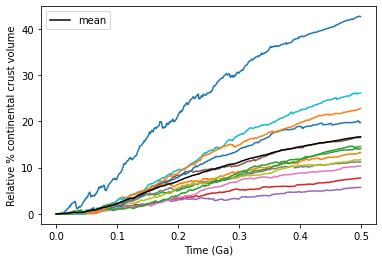

In [50]:
crust_dict = {}
for ensemble in ensembles:
    df = 100* sio2_dict[ensemble].loc[:,[str(p) for p in range(60,71)]].sum(axis=1) / 40
    crust_dict[ensemble] = df.values
    plt.plot(df.index.values/1000, df.values)
    plt.xlabel("Time (Ga)")
    plt.ylabel("Relative % continental crust volume")
crust_df = pd.DataFrame(crust_dict, index=df.index.values)
crust_mean = crust_df.mean(axis=1)
plt.plot(df.index.values/1000, crust_mean.values, c='k', label="mean")
plt.legend()

In [51]:
crust_df['mean'] = crust_df.mean(axis=1)
crust_df['min'] = crust_df.min(axis=1)
crust_df['max'] = crust_df.max(axis=1)
crust_df['stdev'] = crust_df.std(axis=1)
crust_df['e05'] = crust_df['mean'] - crust_df['stdev']/np.sqrt(len(ensembles))
crust_df['e95'] = crust_df['mean'] + crust_df['stdev']/np.sqrt(len(ensembles))
crust_df['c95'] = crust_df['mean'] + crust_df['e95'] * 1.96
crust_df['c05'] = crust_df['mean'] - crust_df['e05'] * 1.96

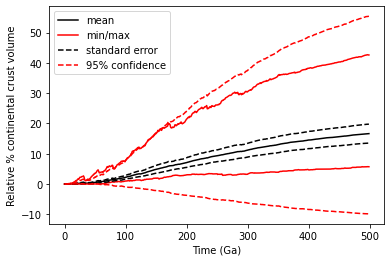

In [55]:
plt.plot(crust_df['mean'], c='k', label='mean')
plt.plot(crust_df['min'], c='r', label='min/max')
plt.plot(crust_df['max'], c='r')
plt.plot(crust_df['e05'], '--', c='k', label='standard error')
plt.plot(crust_df['e95'], '--', c='k')
plt.plot(crust_df['c05'], '--', c='r', label='95% confidence')
plt.plot(crust_df['c95'], '--', c='r')
plt.xlabel("Time (Ga)")
plt.ylabel("Relative % continental crust volume")
plt.legend()
plt.show()
plt.close()